In [1]:
#load all the libraries


import tensorflow as tf
from matplotlib import pyplot
from os import listdir
from matplotlib.image import imread
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten,Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from numpy import asarray
from matplotlib import pyplot
from matplotlib.image import imread


Using TensorFlow backend.


In [2]:
#get the dataset from mnist

mnist=tf.keras.datasets.mnist


In [3]:
#partition data in training and testing data

(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
# resize the training and testing data

testing_data = x_test
testing_label = y_test

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test =  x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

#convert array to 10 categorical array

y_train = to_categorical(y_train,10)
y_test =  to_categorical(y_test,10)



In [5]:
# normalize the training and testing data

x_train = x_train/255
x_test = x_test/255

In [6]:

# create the Sequential model

model = Sequential()

#add Convolution layer with 32 filters having activation relu and then add pooling layer and dropout of 0.2 
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


#add Convolution layer with 64 filters having activation relu and then add pooling layer and dropout of 0.2
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#make fully connected layer of 128 nodes and then add dropout of 0.5
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# now make the output layer with 10 categories
model.add(Dense(10, activation='softmax'))

# compile the model with adam optimizer
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) 

In [7]:
#fit the model with training data and evaluate on the validation data

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 54s 896us/step - loss: 0.2306 - accuracy: 0.9276 - val_loss: 0.0560 - val_accuracy: 0.9804
Epoch 2/15
60000/60000 [==============================] - 56s 928us/step - loss: 0.0942 - accuracy: 0.9718 - val_loss: 0.0335 - val_accuracy: 0.9876
Epoch 3/15
60000/60000 [==============================] - 57s 953us/step - loss: 0.0712 - accuracy: 0.9787 - val_loss: 0.0341 - val_accuracy: 0.9882
Epoch 4/15
60000/60000 [==============================] - 58s 960us/step - loss: 0.0624 - accuracy: 0.9819 - val_loss: 0.0282 - val_accuracy: 0.9905
Epoch 5/15
60000/60000 [==============================] - 59s 980us/step - loss: 0.0531 - accuracy: 0.9835 - val_loss: 0.0247 - val_accuracy: 0.9918
Epoch 6/15
60000/60000 [==============================] - 58s 969us/step - loss: 0.0493 - accuracy: 0.9850 - val_loss: 0.0256 - val_accuracy: 0.9916
Epoch 7/15
60000/60000 [==============================] 

In [8]:
#evaluate the model on the test data

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.024703127801993997
Test accuracy: 0.9930999875068665


In [9]:
model.save('Digit.model')

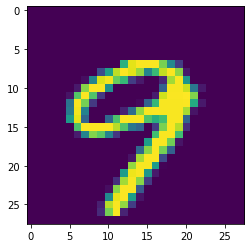

Prediction is  9
Answer is  0


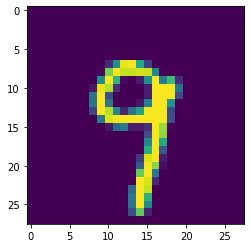

Prediction is  9
Answer is  0


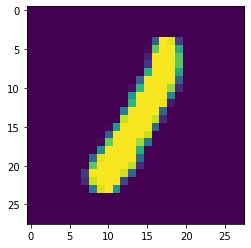

Prediction is  1
Answer is  0


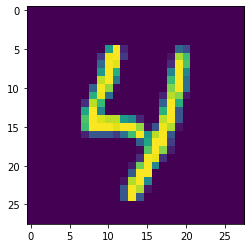

Prediction is  4
Answer is  0


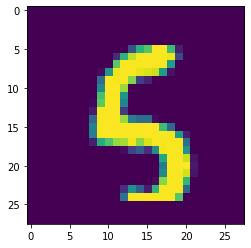

Prediction is  5
Answer is  0


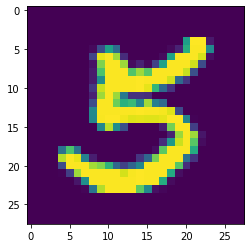

Prediction is  5
Answer is  0


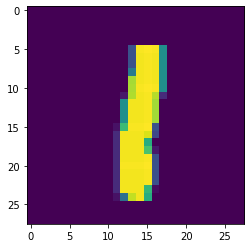

Prediction is  1
Answer is  0


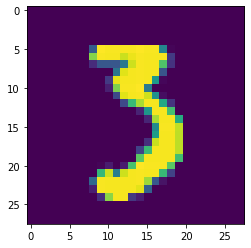

Prediction is  3
Answer is  0


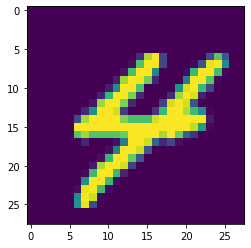

Prediction is  4
Answer is  0


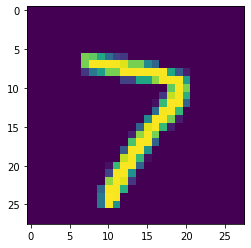

Prediction is  7
Answer is  0


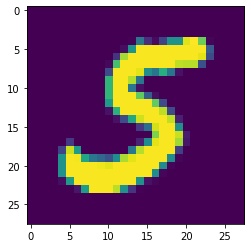

Prediction is  5
Answer is  0


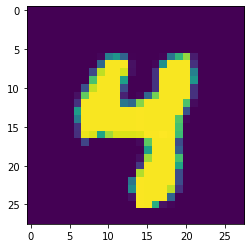

Prediction is  4
Answer is  0


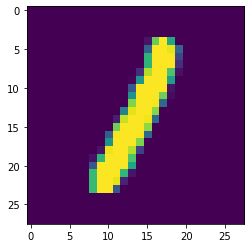

Prediction is  1
Answer is  0


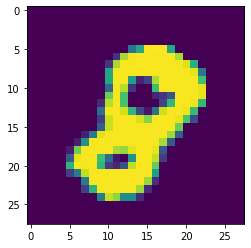

Prediction is  8
Answer is  0


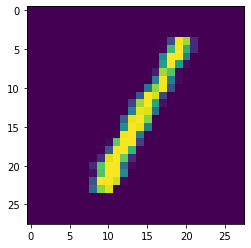

Prediction is  1
Answer is  0


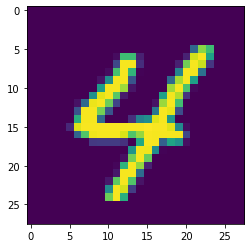

Prediction is  4
Answer is  0


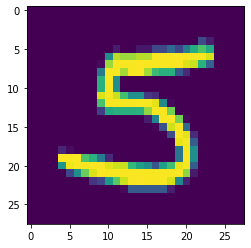

Prediction is  5
Answer is  0


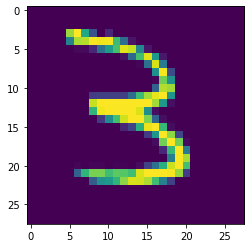

Prediction is  3
Answer is  0


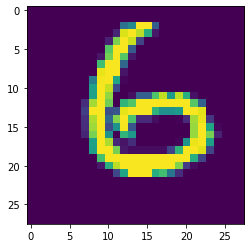

Prediction is  6
Answer is  0


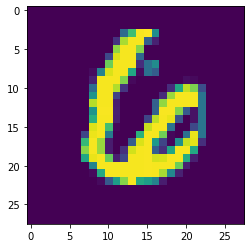

Prediction is  6
Answer is  0


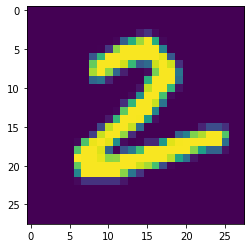

Prediction is  2
Answer is  0


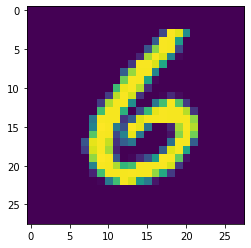

Prediction is  6
Answer is  0


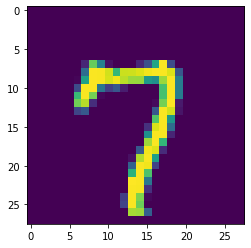

Prediction is  7
Answer is  0


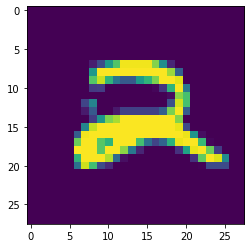

Prediction is  2
Answer is  0


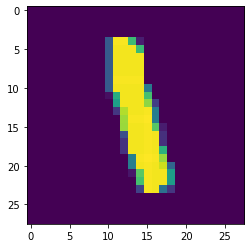

Prediction is  1
Answer is  0


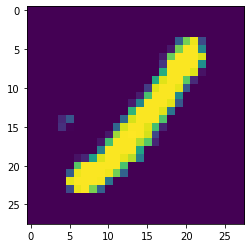

Prediction is  1
Answer is  0


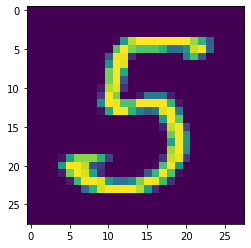

Prediction is  5
Answer is  0


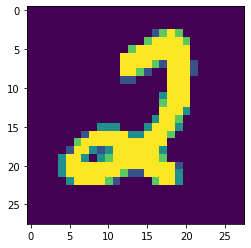

Prediction is  2
Answer is  0


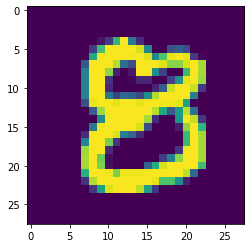

Prediction is  8
Answer is  0


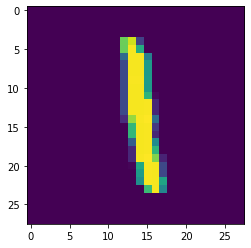

Prediction is  1
Answer is  0


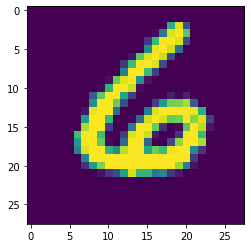

Prediction is  6
Answer is  0


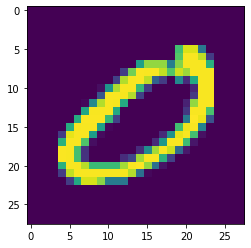

Prediction is  0
Answer is  0


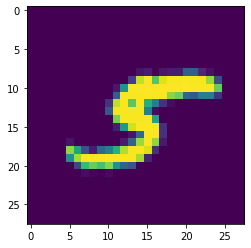

Prediction is  5
Answer is  0


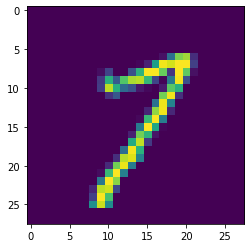

Prediction is  7
Answer is  0


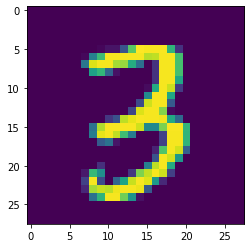

Prediction is  3
Answer is  0


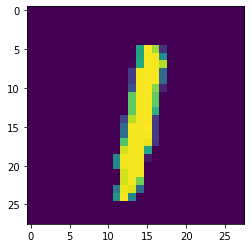

Prediction is  1
Answer is  0


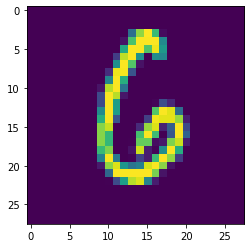

Prediction is  6
Answer is  0


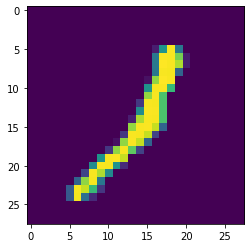

Prediction is  1
Answer is  0


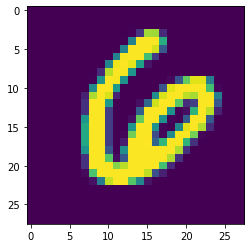

Prediction is  6
Answer is  0


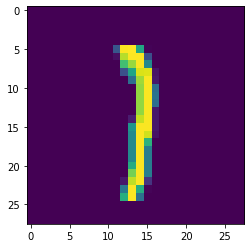

Prediction is  1
Answer is  0


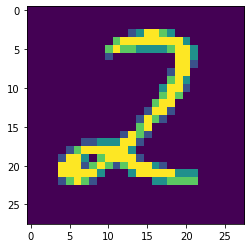

Prediction is  2
Answer is  0


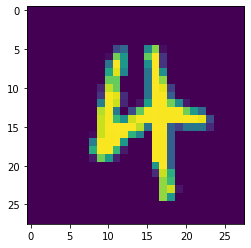

Prediction is  4
Answer is  0


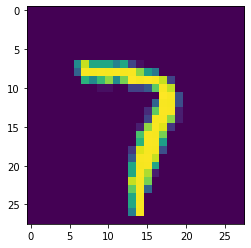

Prediction is  7
Answer is  0


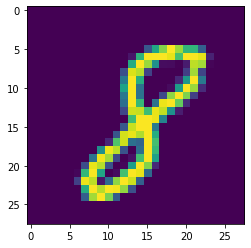

Prediction is  8
Answer is  0


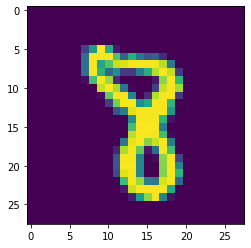

Prediction is  8
Answer is  0


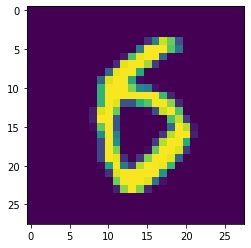

Prediction is  6
Answer is  0


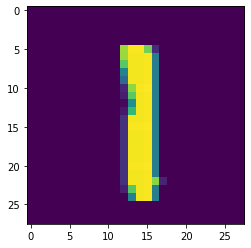

Prediction is  1
Answer is  0


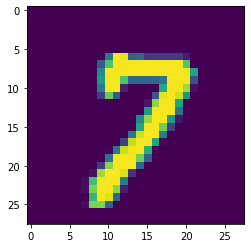

Prediction is  7
Answer is  0


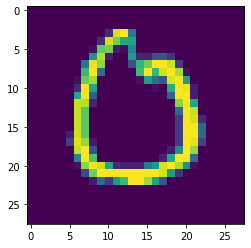

Prediction is  0
Answer is  0


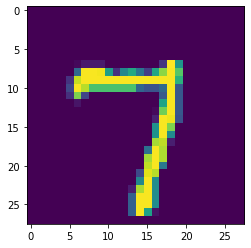

Prediction is  7
Answer is  0


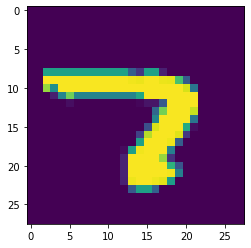

Prediction is  7
Answer is  0


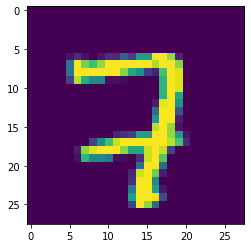

Prediction is  7
Answer is  0


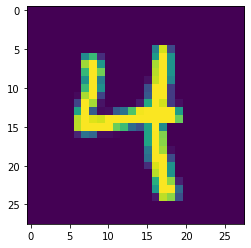

Prediction is  4
Answer is  0


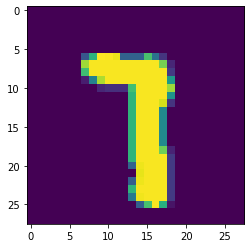

Prediction is  7
Answer is  0


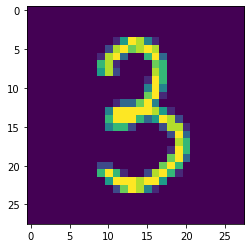

Prediction is  3
Answer is  0


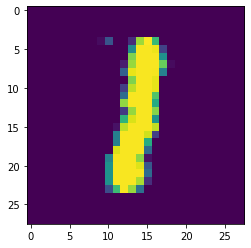

Prediction is  1
Answer is  0


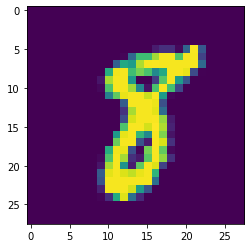

Prediction is  8
Answer is  0


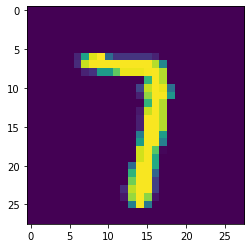

Prediction is  7
Answer is  0


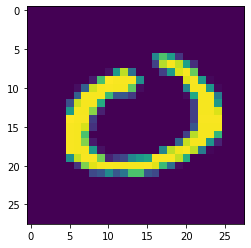

Prediction is  0
Answer is  0


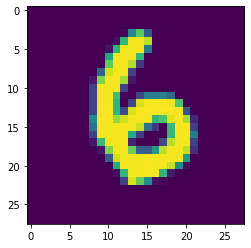

Prediction is  6
Answer is  0


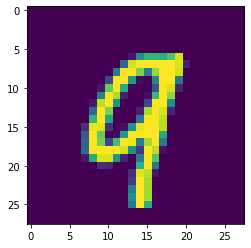

Prediction is  9
Answer is  0


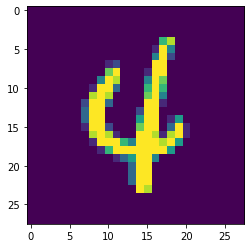

Prediction is  4
Answer is  0


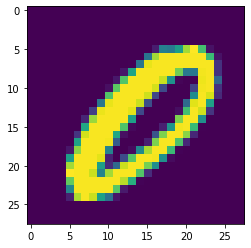

Prediction is  0
Answer is  0


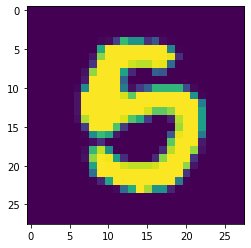

Prediction is  5
Answer is  0


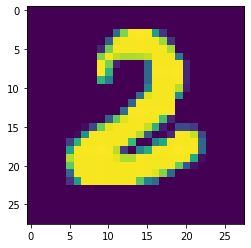

Prediction is  2
Answer is  0


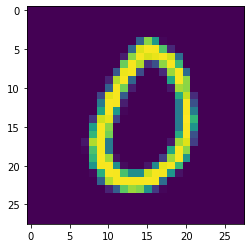

Prediction is  0
Answer is  0


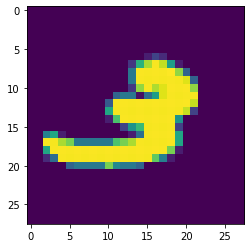

Prediction is  3
Answer is  0


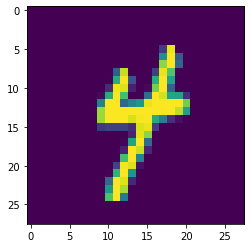

Prediction is  4
Answer is  0


In [ ]:
from random import randint
from numpy import argmax

pred = model.predict(x_test)

for i in range(0,100):
    j = randint(1,10000)
    pyplot.imshow(testing_data[j].reshape(28,28))
    pyplot.show()
    print ("Prediction is ",argmax(pred[j]))
    print ("Answer is ",argmax(testing_label[j]))
    